In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv('HoursExamSample.csv')
df

,Hours,Pass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,0.50,0,0,0,0,1
1,0.75,0,0,0,0,1
2,1.00,0,0,0,0,1
3,1.25,0,0,0,0,1
4,1.50,0,0,0,0,1
5,1.75,0,1,0,0,1
6,1.75,1,1,0,0,1
7,2.00,0,1,0,0,1
8,2.25,1,1,0,0,1
9,2.50,0,1,0,0,1


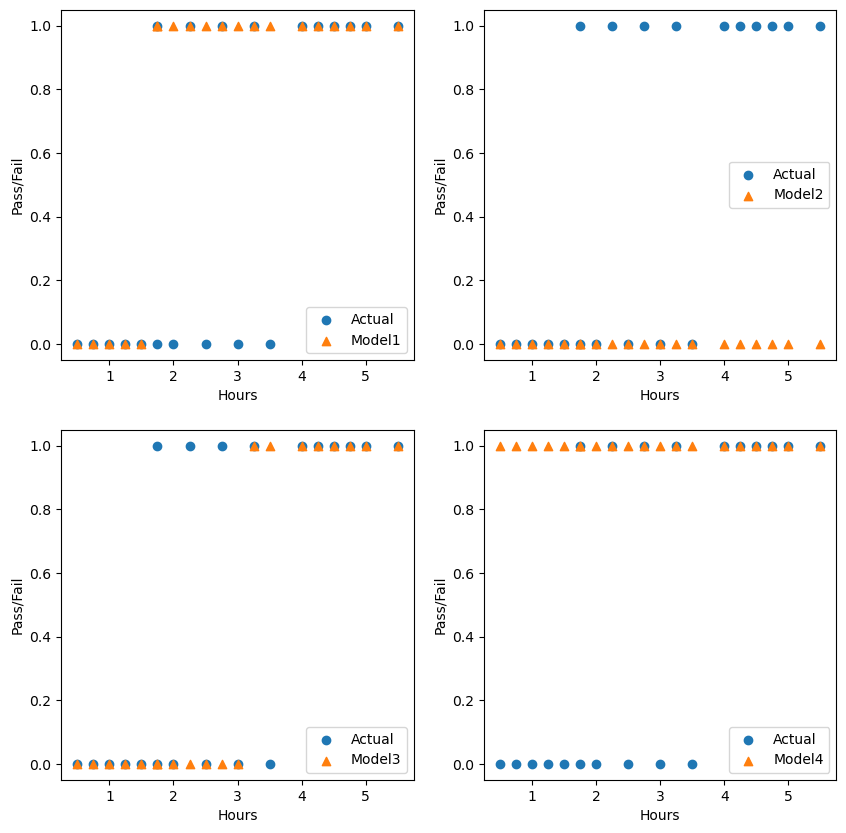

In [4]:
#Plot
models = ['Model1','Model2','Model3','Model4']
plt.figure(figsize=(10,10))

for idx,model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.scatter(df['Hours'],df['Pass'],label='Actual')
    plt.scatter(df['Hours'],df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.xlabel('Hours')
    plt.ylabel('Pass/Fail')
    plt.legend()

### Confusion Matrix

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
for model in models:
    print(model)
    print(classification_report(
    df['Pass'],
    df[model.replace(' ','') + '_Prediction'],
    labels=[1,0],
    target_names=['Pass','Fail']))

Model1
              precision    recall  f1-score   support

        Pass       0.67      1.00      0.80        10
        Fail       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

Model2
              precision    recall  f1-score   support

        Pass       0.00      0.00      0.00        10
        Fail       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

Model3
              precision    recall  f1-score   support

        Pass       0.88      0.70      0.78        10
        Fail       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [11]:
# Compute confusion matrix
# Compare Actual Vs Model 1 Predictions
cnf_matrix = confusion_matrix(df['Pass'],df['Model1_Prediction'],labels=[1,0])
cnf_matrix

array([[10,  0],
       [ 5,  5]])

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [12]:
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [13]:
print('TP:',true_positive(df['Pass'],df['Model1_Prediction']))
print('TN:',true_negative(df['Pass'],df['Model1_Prediction']))
print('FP:',false_positive(df['Pass'],df['Model1_Prediction']))
print('FN:',false_negative(df['Pass'],df['Model1_Prediction']))

TP: 10
TN: 5
FP: 5
FN: 0


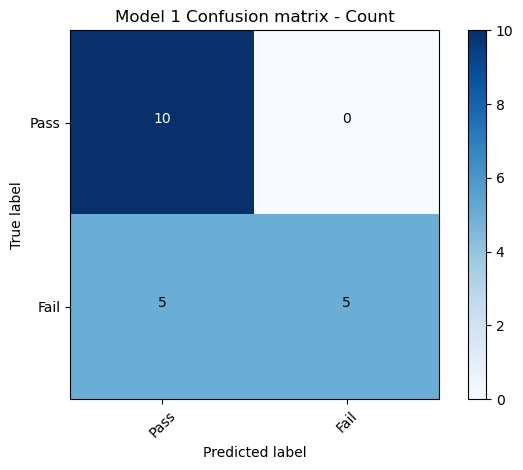

In [14]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title='Model 1 Confusion matrix - Count')

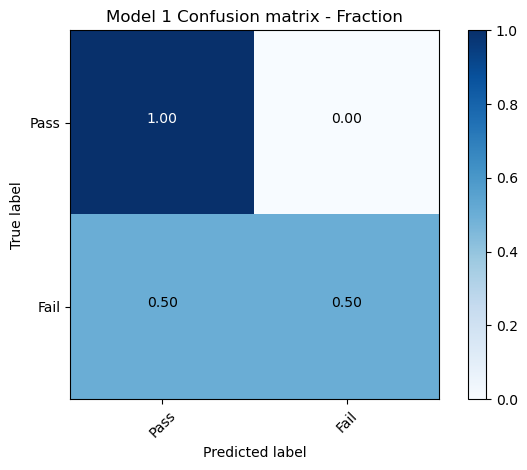

In [15]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title='Model 1 Confusion matrix - Fraction',normalize=True)